### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # 기본 시각화 라이브러리(Matplotlib)
import seaborn as sns

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [3]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0])

## **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

## **Pregrance**
 - 임신횟수

In [4]:
df1["Pregnancies"].nunique()

17

In [5]:
df1["Pregnancies"].value_counts().sort_index()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: count, dtype: int64

In [6]:
df1["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

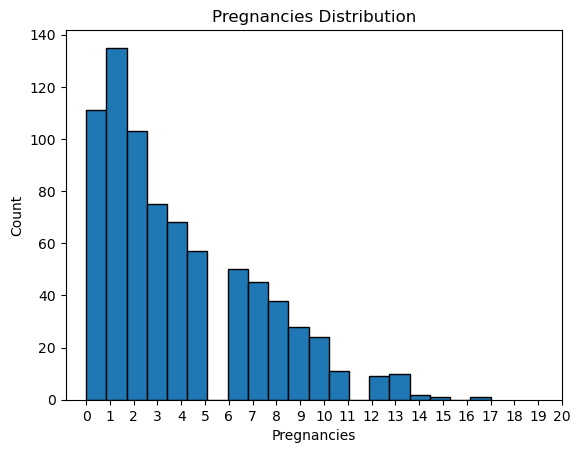

In [7]:
df1["Pregnancies"].plot(kind="hist", bins=20, edgecolor="black")

plt.title("Pregnancies Distribution")
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.xticks(np.arange(0, 21, 1))  # x축 눈금 0부터 20까지, 1씩
plt.show()

<Axes: ylabel='Pregnancies'>

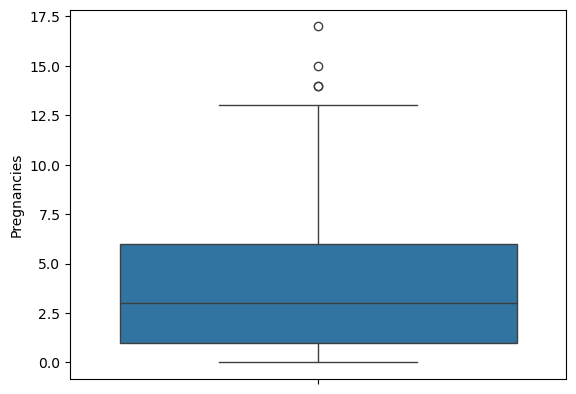

In [8]:
sns.boxplot(df1['Pregnancies'])

### **Pregnancies 변수 인사이트 정리**

- '임신 횟수'를 나타는 변수로 0이 나올 수 있는 변수이다.
- 분포를 확인한 결과, 0~3회 구간에 관측치가 집중되어 있고 임신 횟수가 증가할수록 빈도가 점차 감소하는 우측 편향 분포를 보인다.
- 10회 이상 임신한 관측치는 소수로 나타나며, 이는 전체 분석 및 모델링 과정에서 이상치로 작용할 가능성이 있다.

## **glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

In [9]:
(df1["Glucose"]==0).sum()

np.int64(5)

In [10]:
df1["Glucose"] = df1["Glucose"].replace(0, np.nan)

In [11]:
df1["Glucose"].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

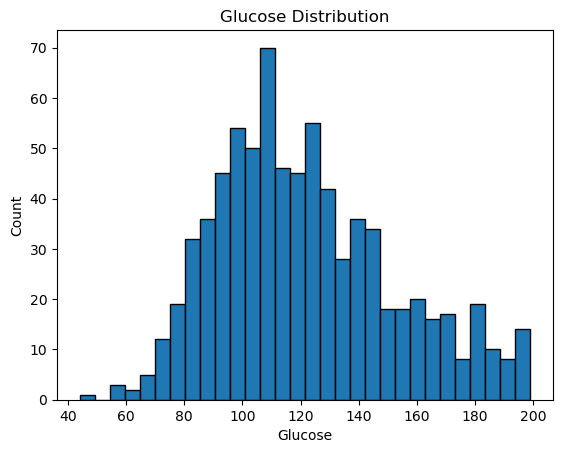

In [12]:
df1["Glucose"].plot(kind="hist", bins=30, edgecolor="black")

plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='Glucose'>

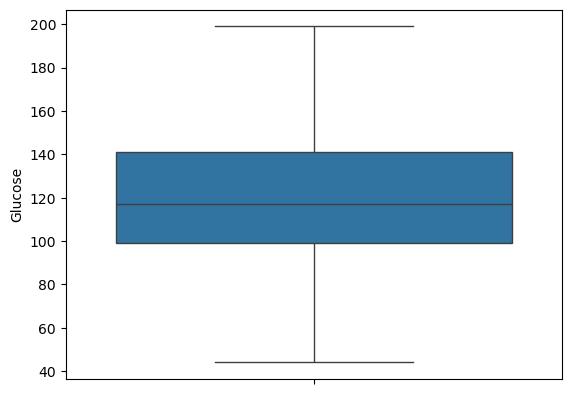

In [13]:
sns.boxplot(df1['Glucose'])

In [14]:
df1["Glucose"].fillna(df1["Glucose"].median(), inplace=True)

In [15]:
df1.groupby("Outcome")["Glucose"].mean()

Outcome
0    110.682000
1    142.130597
Name: Glucose, dtype: float64

Axes(0.125,0.11;0.775x0.77)


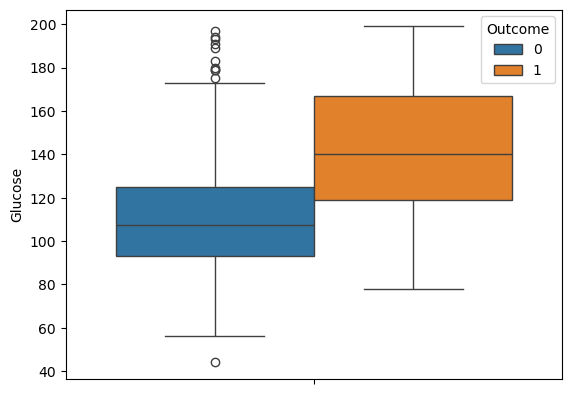

In [16]:
print(sns.boxplot(y="Glucose",hue="Outcome",data=df1))

### **Glucose 변수 인사이트 정리**

- '혈장 포도당 농도'를 의미하는 변수이므로 의학적으로 0이 존재할 수 없다.
- 따라서 0을 나타내는 관측지를 결측지로 처리하고 분포를 확인해본 결과, 우측 편향 분포를 그리고 있다.
- 평균과 박스플롯을 보면 알 수 있듯이, 당뇨병인 사람이 아닌사람보다 glucose가 더 높게 나오고 있으므로 둘의 상관관계가 강할 것으로 보인다.

## **bloodpressure**
- 혈압
- 혈압도 0일 수는 없다 

In [17]:
(df1['BloodPressure']==0).sum()

np.int64(35)

In [18]:
df1["BloodPressure"] = df1["BloodPressure"].replace(0, np.nan)

In [19]:
df1["BloodPressure"].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

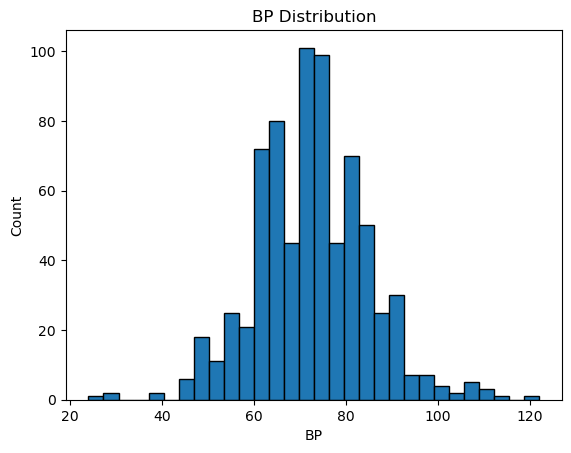

In [20]:
df1["BloodPressure"].plot(kind="hist", bins=30, edgecolor="black")

plt.title("BP Distribution")
plt.xlabel("BP")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='BloodPressure'>

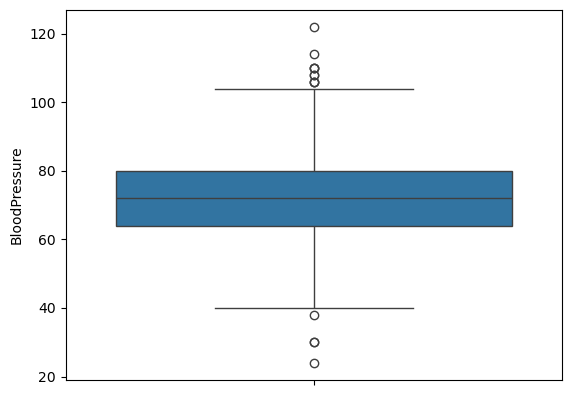

In [21]:
sns.boxplot(df1["BloodPressure"])

In [22]:
df1["BloodPressure"].fillna(df1["BloodPressure"].median(), inplace=True)

### **BloodPressure 변수 인사이트 정리**

- '혈압'을 의미하는 변수이므로 의학적으로 0이 존재할 수 없다.
- 따라서 0을 나타내는 관측지를 결측지로 처리하고 분포를 확인해본 결과, 비교적 완만한 모양의 분포를 그리고 있다.
- 일부 이상치가 존재하였으나 실제 임상적으로 가능한 범위로 판단되어 제거하지 않았다.
- 결측지는 중앙값으로 대체해주었다.

## **SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

In [23]:
(df1['SkinThickness']==0).sum()

np.int64(227)

In [24]:
df1["SkinThickness"] = df1["SkinThickness"].replace(0, np.nan)

In [25]:
df1["SkinThickness"].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

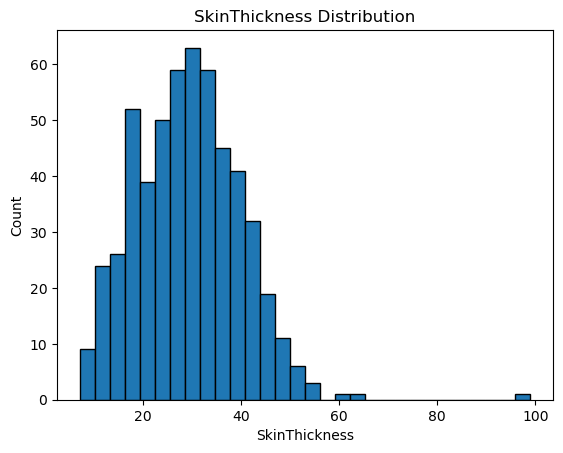

In [26]:
df1["SkinThickness"].plot(kind="hist", bins=30, edgecolor="black")

plt.title("SkinThickness Distribution")
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='SkinThickness'>

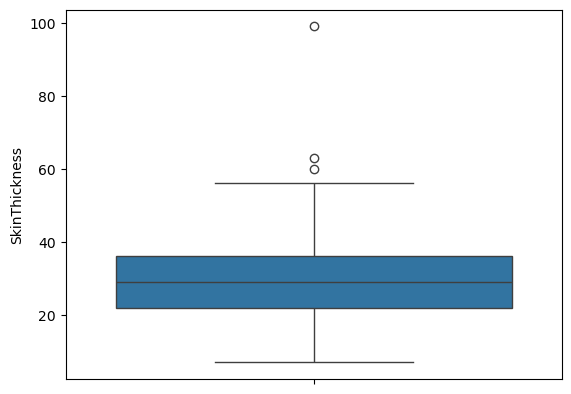

In [27]:
sns.boxplot(df1['SkinThickness'])

### **SkinThickness 변수 인사이트 정리**

- '삼두근 피부 두께'를 의미하는 변수이므로 0이 존재할 수 없어 결측치로 처리하였다.
- 0의 관측지 개수가 227개로 결측치를 어떻게 처리할 것인지에 대한 중요도가 높아보인다.
- 분포 그려보면 오른쪽 치우침이 약간 있는 것으로 확인해볼 수 있다.

## **Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.  

In [28]:
(df1['Insulin']==0).sum()

np.int64(374)

In [29]:
df1["Insulin"] = df1["Insulin"].replace(0, np.nan)

In [30]:
df1["Insulin"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

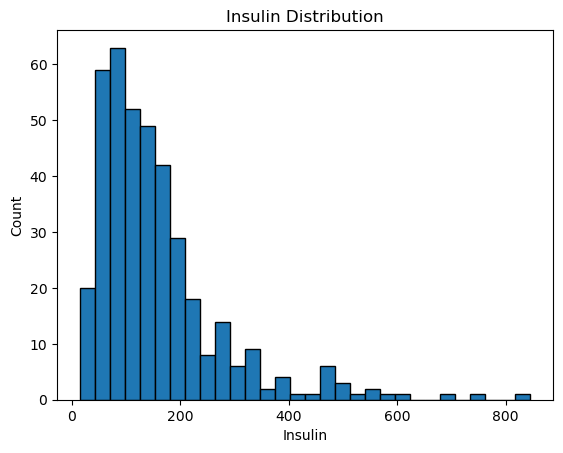

In [31]:
df1["Insulin"].plot(kind="hist", bins=30, edgecolor="black")

plt.title("Insulin Distribution")
plt.xlabel("Insulin")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='Insulin'>

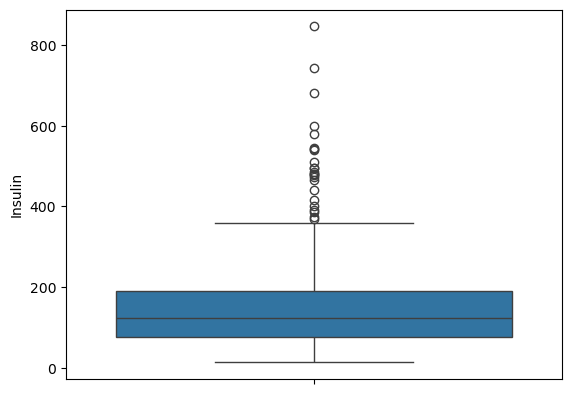

In [32]:
sns.boxplot(df1['Insulin'])

In [33]:
df1["Insulin"].fillna(df1["Insulin"].median(), inplace=True)

### **Insulin 변수 인사이트 정리**


- Insulin 변수는 당뇨와 직접적으로 연관된 핵심 지표이나, 전체 데이터의 상당 부분이 0 값으로 기록되어 있어 결측치 문제가 심각하다.
- 0을 제외한 실제 분포는 강한 오른쪽 편향과 다수의 이상치를 포함하고 있다.

## **BMI**
- 0이 나올 수 없는 값

In [34]:
(df1['BMI']==0).sum()

np.int64(11)

In [35]:
df1["BMI"] = df1["BMI"].replace(0, np.nan)

In [36]:
df1["BMI"].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

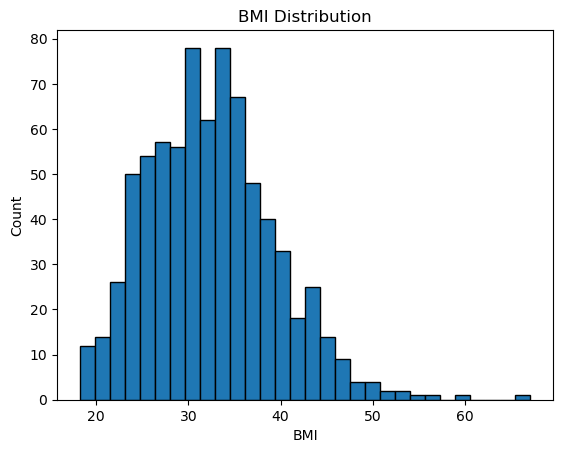

In [37]:
df1["BMI"].plot(kind="hist", bins=30, edgecolor="black")

plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='BMI'>

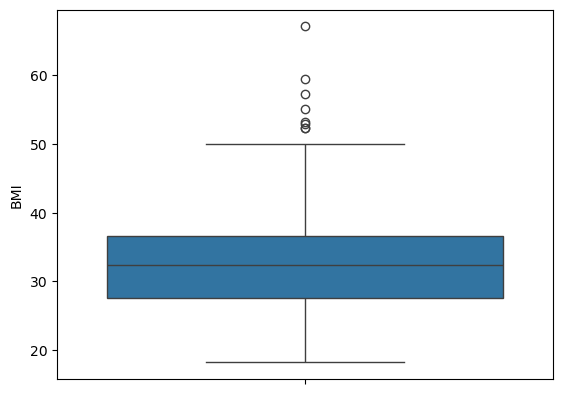

In [38]:
sns.boxplot(df1['BMI'])

In [39]:
df1["BMI"].fillna(df1["BMI"].median(), inplace=True)

### **BMI 변수 인사이트 정리**

- 체질량지수를 나타내며 당뇨병과의 연관성이 높은 변수이다.
- 분포는 비교적 정규분포에 가깝고 약갼의 오른쪽 치움이 있다.

## **파생변수 생성 및 추가 전처리**

### **BMI 범주화**

In [40]:
df1["BMI_category"] = pd.cut(
    df1["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["저체중", "정상", "과체중", "비만"]
)
# 이후 원핫 인코딩 필요

BMI 기준 출처: https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index?introPage=intro_3.html

In [41]:
pd.crosstab(df1["BMI_category"], df1["Outcome"], normalize="index")

Outcome,0,1
BMI_category,,
저체중,1.000000,0.000000
정상,0.935185,0.064815
과체중,0.755556,0.244444
비만,0.544118,0.455882


- BMI를 범주화 했을 때 저체중에서 비만으로 갈수록 당뇨병 발병률이 높다. 

### **Age 구간화**

In [42]:
df1["Age_group"] = pd.cut(
    df1["Age"],
    bins=[20, 30, 40, 50, 60, 100],
    labels=["20대", "30대", "40대", "50대", "60대+"]
)


In [43]:
pd.crosstab(df1["Age_group"], df1["Outcome"], normalize="index")

Outcome,0,1
Age_group,,
20대,0.784173,0.215827
30대,0.515924,0.484076
40대,0.433628,0.566372
50대,0.425926,0.574074
60대+,0.740741,0.259259


- 나이대 별로 구간을 나누고 당뇨 발병률을 보았을 때, 20대에서 50대로 갈수록 발병률이 높아진다.
- 60대 이상 구간은 다시 발병률이 낮아지는 것으로 보인다.

### **임신 경험 여부**

In [44]:
df1["Pregnant_experience"] = (df1["Pregnancies"] > 0).astype(int)

In [45]:
pd.crosstab(df1["Pregnant_experience"], df1["Outcome"], normalize="index")

Outcome,0,1
Pregnant_experience,,
0,0.657658,0.342342
1,0.649924,0.350076


- 임신 경험이 있는 사람의 발병률이 약간 더 높은 것으로 보이지만 유의미한 차이는 없는 것으로 보인다.

### **SkinThickness 결측치 처리**

결측치가 많은 변수이므로 이를 어떻게 전처리 할지가 결과에 큰 영향을 미칠 수 있다.
그렇기 때문에 다른 변수들을 처리한 방법과 같이 전체 중앙값으로 대체하기 보다 다른 방법을 사용해보았다.
위에서 생성한 BMI 범주에 따라 각 범주의 중앙값으로 대체하는 방법을 사용해보자.

In [47]:
df1["SkinThickness"] = df1.groupby("BMI_category")["SkinThickness"].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\ddaen\AppData\Local\Temp\ipykernel_24484\2756557190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1["SkinThickness"] = df1.groupby("BMI_category")["SkinThickness"].transform(


In [48]:
(df1['SkinThickness']==0).sum()

np.int64(0)

In [61]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_category_정상',
       'BMI_category_과체중', 'BMI_category_비만', 'Age_group_30대', 'Age_group_40대',
       'Age_group_50대', 'Age_group_60대+', 'Pregnant_experience_1'],
      dtype='object')

# **모델링하기**

In [52]:
df1 = pd.get_dummies(
    df1,
    columns=["BMI_category", "Age_group", "Pregnant_experience"],
    drop_first=True
)

In [62]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
         'DiabetesPedigreeFunction', 'Age', 'Pregnant_experience_1']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [63]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [64]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 557    110.0           76.0           23.0    125.0  27.8   
 472    119.0           66.0           27.0    125.0  38.8   
 107    144.0           58.0           28.0    140.0  29.5   
 28     145.0           82.0           19.0    110.0  22.2   
 700    122.0           76.0           27.0    200.0  35.9   
 ..       ...            ...            ...      ...   ...   
 369    133.0          102.0           28.0    140.0  32.8   
 491     89.0           90.0           30.0    125.0  33.5   
 35     103.0           60.0           33.0    192.0  24.0   
 33      92.0           92.0           17.0    125.0  19.9   
 261    141.0           72.0           23.0    125.0  30.0   
 
      DiabetesPedigreeFunction  Age  Pregnant_experience_1  
 557                     0.237   58                   True  
 472                     0.259   22                  False  
 107                     0.287   37                   True  
 28       

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [66]:
X.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnant_experience_1       0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기**

In [56]:
# 4) 학습 수행
from sklearn.ensemble import RandomForestClassifier

In [72]:
model = RandomForestClassifier(random_state=51)
model.fit(X_train, Y_train) # 학습 수행

RandomForestClassifier(random_state=51)

In [73]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [74]:
Y_train_pred = model.predict(X_train)

In [75]:
Y_test_pred = model.predict(X_test)

In [76]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  1.0
검증 정확도 :  0.7291666666666666


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [78]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [79]:
# 파이프라인 구조 설계
#스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline( RandomForestClassifier(n_estimators=100, random_state=51) )
model_pipe

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=51))])

In [80]:
from sklearn.model_selection import GridSearchCV

#### **랜덤 포레스트의 하이퍼파라미터**

- n_estimators는 생성할 의사결정나무의 개수를 의미한다. 트리의 개수가 증가할수록 모델의 예측은 안정적이 되지만, 학습 시간이 증가할 수 있다. 일반적으로 과적합에 직접적인 영향을 주기보다는 성능의 안정성에 영향을 준다. max_depth는 각 의사결정나무의 최대 깊이를 제한하는 파라미터이다. max_depth 값이 커질수록 트리가 복잡해져 학습 데이터에 과도하게 적합될 가능성이 있으며, 이로 인해 과적합이 발생할 수 있다. 반대로 값을 제한하면 모델의 복잡도가 감소하여 일반화 성능이 향상될 수 있다. min_samples_split은 하나의 노드를 분할하기 위해 필요한 최소 샘플 수를 의미한다. 이 값이 커질수록 노드 분할이 제한되어 모델이 단순해지며, 과적합을 방지하는 효과가 있다. min_samples_leaf는 리프 노드에 포함되어야 하는 최소 샘플 수를 의미한다. 값이 커질수록 리프 노드가 지나치게 세분화되는 것을 방지하여 노이즈에 덜 민감한 모델을 만들 수 있으며, 과적합 완화에 중요한 역할을 한다. max_features는 각 노드 분기 시 고려할 특성의 개수를 의미한다. 이 값을 제한하면 각 트리가 서로 다른 특성 조합을 사용하게 되어 트리 간 다양성이 증가하고, 결과적으로 과적합을 줄일 수 있다. 마지막으로 class_weight는 클래스 불균형 문제를 보정하기 위한 파라미터로, 당뇨병 환자(Outcome=1)와 비환자(Outcome=0) 간의 비율 차이를 고려하여 학습 시 가중치를 부여할 수 있다. 

In [82]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {
    "randomforestclassifier__n_estimators": [100, 200],
    "randomforestclassifier__max_depth": [3, 5, 7, None],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 5, 10],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
    "randomforestclassifier__class_weight": [None, "balanced"]
}


grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)
grid_model1.fit(X_train, Y_train)
best_model1 = grid_model1.best_estimator_

In [83]:
best_model1

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=10,
                                        random_state=51))])

In [88]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [89]:
from sklearn.metrics import classification_report

In [90]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       379
           1       0.73      0.88      0.80       197

    accuracy                           0.85       576
   macro avg       0.83      0.85      0.84       576
weighted avg       0.86      0.85      0.85       576



In [87]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       121
           1       0.64      0.70      0.67        71

    accuracy                           0.74       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.75      0.74      0.75       192



# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  